In [1]:
# evaluate mlp for monthly car sales dataset
from math import sqrt
import seaborn as sns
from numpy import array
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib.ticker import MultipleLocator
from keras.layers import Conv1D
from keras.layers import ConvLSTM2D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import TimeDistributed
from statsmodels.tsa.stattools import adfuller
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from numpy import mean
from numpy import median

2024-05-12 10:36:01.466362: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Read data

In [2]:
EVdata = read_csv("stationAggDaytoDay2011_2020May12.csv", header = 0, index_col = 0)

In [3]:
EVdata.head()

,Station Name,StartDate,counts,Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons)
0,BRYANT 1,2011-10-13,2,8.262052,3.470,1.037
1,BRYANT 1,2011-10-14,1,6.259466,2.629,0.786
2,BRYANT 1,2011-10-15,1,4.622894,1.942,0.580
3,BRYANT 1,2011-10-17,1,4.023361,1.690,0.505
4,BRYANT 1,2011-10-18,1,15.474944,6.499,1.942


In [4]:
testData= EVdata.loc[EVdata["Station Name"] == "HAMILTON 1", :]

In [5]:
testData

,Station Name,StartDate,counts,Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons)
16888,HAMILTON 1,2011-07-29,1,6.249457,2.625,0.784
16889,HAMILTON 1,2011-07-30,5,28.978653,12.171,3.637
16890,HAMILTON 1,2011-07-31,3,37.209163,15.628,4.670
16891,HAMILTON 1,2011-08-01,1,5.041244,2.117,0.633
16892,HAMILTON 1,2011-08-02,1,4.197217,1.763,0.527
...,...,...,...,...,...,...
20091,HAMILTON 1,2020-10-29,1,11.838000,4.972,1.486
20092,HAMILTON 1,2020-10-30,3,25.440000,10.685,3.193
20093,HAMILTON 1,2020-10-31,2,15.122000,6.352,1.898
20094,HAMILTON 1,2020-11-01,2,44.383000,18.641,5.570


In [6]:
series = EVdata.loc[EVdata["Station Name"] == "HAMILTON 1", ["Energy (kWh)"]]

In [7]:
series

,Energy (kWh)
16888,6.249457
16889,28.978653
16890,37.209163
16891,5.041244
16892,4.197217
...,...
20091,11.838000
20092,25.440000
20093,15.122000
20094,44.383000


In [291]:
EVdataTest = read_csv("EVcharging_daily_data_test.csv", header = 0, index_col = 0)

In [349]:
femaleBirth = read_csv("daily-total-female-births.csv", header = 0, index_col = 0)

In [374]:
householdPower = read_csv("household_power_consumption_days.csv", header = 0, index_col = 0)

In [375]:
series = householdPower.loc[:, ["Global_active_power"]]

In [3]:
carsales = read_csv("monthly-car-sales.csv", header = 0, index_col = 0)
series = carsales

In [376]:
householdPower.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933319
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666732
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433281
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900043
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800011


In [380]:
series = EVdataTest.loc[EVdataTest["stationName"] == "PALO ALTO CA / BRYANT #3", ["energy"]]

In [351]:
series = femaleBirth

In [370]:
series.head()

,Sales
Month,
1960-01,6550
1960-02,8728
1960-03,12026
1960-04,14395
1960-05,14587


In [297]:
series.shape

(151, 1)

In [8]:
def plot_y(variable):
    pyplot.figure(figsize = (10, 4))
    pyplot.plot(variable)
    pyplot.title("Temporal change of car sales")
    pyplot.xlabel('time')
    pyplot.xticks(rotation=45)
    pyplot.gca().xaxis.set_major_locator(MultipleLocator(5))
    pyplot.show();

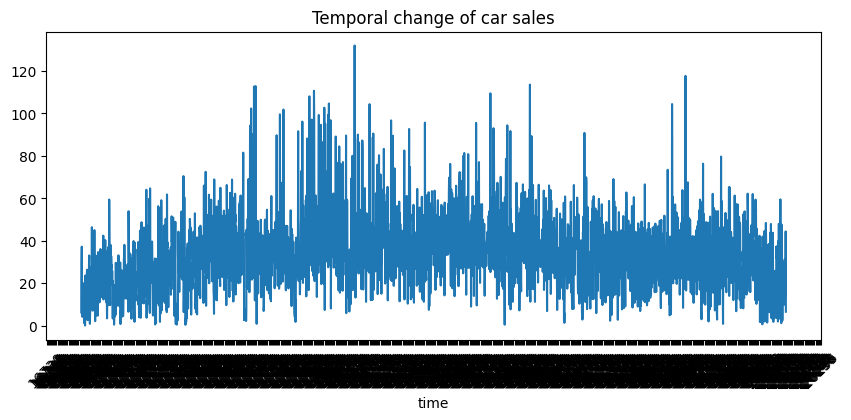

In [10]:
plot_y(series["Energy (kWh)"])

#### Check stationarity

In principle we do not need to check for stationarity nor correct for it when we are using an LSTM. However, if the data is stationary, it will help with better performance and make it easier for the neural network to learn.

##### Dickey-Fuller Test to Check Stationarity

In statistics, the Dickey–Fuller test tests the null hypothesis that a unit root is present in an autoregressive model. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity.

Stationary series has constant mean and variance over time. Rolling average and the rolling standard deviation of time series do not change over time.

##### Dickey-Fuller test

Null Hypothesis (H0): It suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

Alternate Hypothesis (H1): It suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [11]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()
    
    pyplot.figure(figsize=(14,5))
    sns.despine(left=True)
    orig = pyplot.plot(timeseries, color='blue',label='Original')
    mean = pyplot.plot(rolmean, color='red', label='Rolling Mean')
    std = pyplot.plot(rolstd, color='black', label = 'Rolling Std')

    pyplot.legend(loc='best'); pyplot.title('Rolling Mean & Standard Deviation')
    pyplot.xticks(rotation=45)
    pyplot.gca().xaxis.set_major_locator(MultipleLocator(5))
    pyplot.show()
    
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

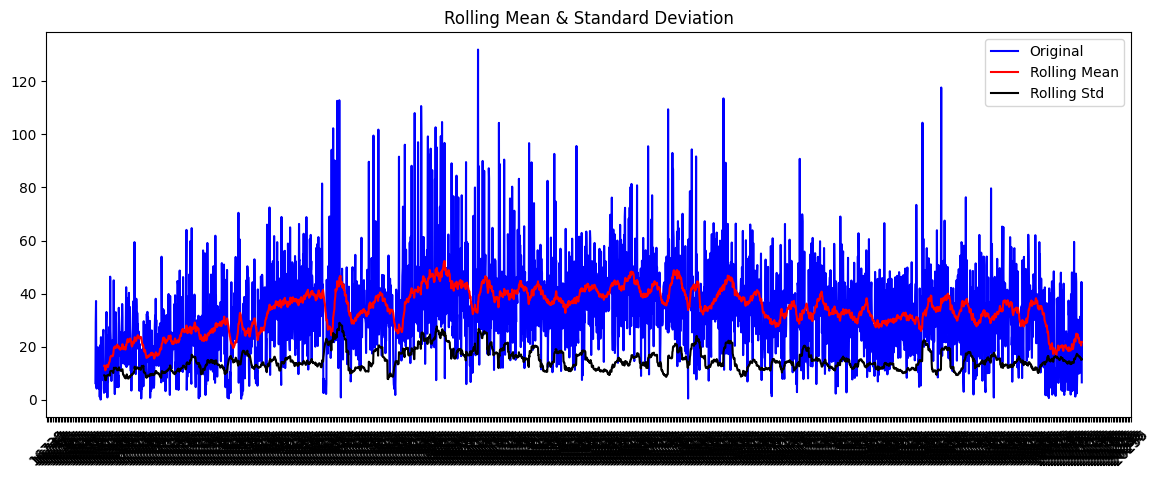

<Results of Dickey-Fuller Test>
Test Statistic                   -4.857003
p-value                           0.000042
#Lags Used                       28.000000
Number of Observations Used    3179.000000
Critical Value (1%)              -3.432409
Critical Value (5%)              -2.862450
Critical Value (10%)             -2.567254
dtype: float64


In [12]:
test_stationarity(series)

### Prepare data for model training

In [100]:
def data_normalize(dataset):
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    return dataset, scaler

In [101]:
# split a univariate dataset into train/test sets
def train_test_split(data, train_val_split_ratio):
    n_test = round(len(data)*(1 - train_val_split_ratio))
    return data[:-n_test], data[-n_test:]

In [102]:
# transform list into supervised learning format
def series_to_supervised(data, n_in, n_out=1):
    df = DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = concat(cols, axis=1)
    # drop rows with NaN values
    agg.dropna(inplace=True)
    return agg.values

In [103]:
def print_train_val_data(verbose = True):
    print("train data (raw) shape: ", train.shape)
    print("train data (processed) shape", data_train.shape)
    print("train data (processed) x shape: ", train_x.shape)
    print("train data (processed) y shape: ", train_y.shape)
    print("--------------------------------------------------------------------------")
    if(verbose):
        print("train data (raw) head: \n", train[0: 5])
        print("train data (processed) head: \n", data_train[0: 5])
        print("train data x (processed) head: \n", train_x[0: 5])
        print("train data y (processed) head: \n", train_y[0: 5])
        print("--------------------------------------------------------------------------")
    print("val data (raw) shape: ", val.shape)
    print("val data (processed) shape", data_val.shape)
    print("val data (processed) x shape: ", val_x.shape)
    print("val data (processed) y shape: ", val_y.shape)
    print("--------------------------------------------------------------------------")
    if(verbose):
        print("val data (raw) head: \n", val[0: 5])
        print("val data (processed) head: \n", data_val[0: 5])
        print("val data x (processed) head: \n", val_x[0: 5])
        print("val data y (processed) head: \n", val_y[0: 5])

In [104]:
def data_reshape(train_x, model_name):
    if(model_name in ["CNN", "LSTM"]):
        train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], 1))
    elif (model_name == "CnnLSTM"):
        train_x = train_x.reshape((train_x.shape[0], n_seq, n_steps, 1))
    elif (model_name == "ConvLSTM"):
        train_x = train_x.reshape((train_x.shape[0], n_seq, 1, n_steps, 1))
        
    return train_x

### Define model

In [105]:
# one-step simple forecast
def naive_persist_forcast(history):
    return history[-naive_n]

In [106]:
# one-step simple forecast
def naive_average_forcast(history):
    # naive_n, offset, avg_type = config
    values = list()
    if offset == 1:
        values = history[-naive_n:]
    else:
        # skip bad configs
        if naive_n*offset > len(history):
            raise Exception('Config beyond end of data: %d %d' % (naive_n,offset))
        # try and collect n values using offset
        for i in range(1, naive_n + 1):
            ix = i * offset
            values.append(history[-ix])
    # check if we can average
    if len(values) < 2:
        raise Exception('Cannot calculate average')
    # mean of last n values
    if avg_type == 'mean':
        return mean(values)
    # median of last n values
    return median(values)

In [245]:
def MLP(measure = "mae", optimizer = "adam"):
    # define model
    model = Sequential()
    model.add(Dense(n_nodes, activation = 'relu', input_dim = n_input))
    model.add(Dropout(0.2))
    model.add(Dense(n_nodes, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss = measure, optimizer = optimizer)

    return model

In [246]:
def CNN(measure = "mae", optimizer = "adam", n_filters = 256, n_kernel = 3):

    print("        entering CNN")

    # define model
    model = Sequential()
    model.add(Conv1D(filters = n_filters, kernel_size = n_kernel, activation='relu', input_shape=(n_input, 1)))
    model.add(Dropout(0.2))
    model.add(Conv1D(filters = n_filters, kernel_size = n_kernel, activation='relu'))
    model.add(Dropout(0.2))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss = measure, optimizer = optimizer)

    print("        leaving CNN")
    
    return model

In [247]:
def myLSTM(measure = "mae", optimizer = "adam"):
    print("        entering LSTM")

    # define model
    model = Sequential()
    model.add(LSTM(n_nodes, activation='relu', input_shape=(n_input, 1)))
    model.add(Dropout(0.2))
    model.add(Dense(n_nodes, activation='relu'))
    model.add(Dense(1))
    model.compile(loss = measure, optimizer = optimizer)

    print("        leaving LSTM")

    return model

In [248]:
def CnnLSTM(measure = "mae", optimizer = "adam"):
    print("        entering CnnLSTM")

    # define model
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=n_filters, kernel_size=n_kernel,
    activation='relu', input_shape=(None,n_steps,1))))
    model.add(Dropout(0.2))
    model.add(TimeDistributed(Conv1D(filters=n_filters, kernel_size=n_kernel,
    activation='relu')))
    model.add(Dropout(0.2))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(n_nodes, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_nodes, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss = measure, optimizer = optimizer)

    print("        leaving CnnLSTM")

    return model

In [249]:
def ConvLSTM(measure = "mae", optimizer = "adam"):
    print("        entering ConvLSTM")

    # define model
    model = Sequential()
    model.add(ConvLSTM2D(filters = n_filters, kernel_size=(1, n_kernel), activation='relu',
    input_shape=(n_seq, 1, n_steps, 1)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(n_nodes, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss = measure, optimizer = optimizer)

    print("        leaving ConvLSTM")

    return model

### Fit model

In [219]:
# fit a model
def model_fit(train, val):
    print("    enter model fit: ")
    # prepare data
    # training data
    data_train = series_to_supervised(train, n_input)
    train_x, train_y = data_train[:, :-1], data_train[:, -1]
    # validation data
    data_val = series_to_supervised(val, n_input)
    val_x, val_y = data_val[:, :-1], data_val[:, -1]

    ## reshape data
    train_x = data_reshape(train_x, model_name)
    val_x = data_reshape(val_x, model_name)
    
    # define model
    if(model_name == "CNN"):
        model = CNN(measure_training, optimizer, n_filters)
    elif (model_name == "MLP"):
        model = MLP(measure_training, optimizer)
    elif (model_name == "LSTM"):
        model = myLSTM(measure_training, optimizer)
    elif (model_name == "CnnLSTM"):
        model = CnnLSTM(measure_training, optimizer)
    elif (model_name == "ConvLSTM"):
        model = ConvLSTM(measure_training, optimizer)
    else:
        model = MLP(measure_training, optimizer)

    print("        train x shape: ", train_x.shape)
    print("        train y shape: ", train_y.shape)
    
    # fit
    history = model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, validation_data=(val_x, val_y), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)] if earlyStop else None, 
                    verbose=model_verbose, shuffle=False)
            
    print("    finish model fit!")
              
    return model, history

In [220]:
# visualize model loss
def plot_model_loss(history):
    '''
    For each train/test loss trajectory, plot loss by epoch
    '''
    pyplot.figure(figsize = (8, 4))
    pyplot.plot(history.history['loss'], label='Train Loss')
    pyplot.plot(history.history['val_loss'], label='Test Loss')
    pyplot.title("Model loss: {}".format(model_name))
    pyplot.ylabel('loss')
    pyplot.xlabel('epochs')
    pyplot.legend(loc='upper right')
    pyplot.show();

In [221]:
# root mean squared error or rmse
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

### Model training and validation

In [222]:
# forecast with a pre-fit model
def model_predict(model, history):
    # prepare data
    history_array = array(history[-n_input:])
    if(model_name in ["MLP", "CNN", "LSTM"]):
        x_input = history_array.reshape(1, n_input)
    elif(model_name == "CnnLSTM"):
        x_input = history_array.reshape((1, n_seq, n_steps, 1))
    elif(model_name == "ConvLSTM"):
        x_input = history_array.reshape((1, n_seq, 1, n_steps, 1))
    
    # forecast
    yhat = model.predict(x_input, verbose=0)
 
    return yhat[0]

In [223]:
# invert predictions
def invert_predict(val_predict, val_y):
    val_predict_scaler = scaler.inverse_transform([val_predict])
    val_y_scaler = scaler.inverse_transform(val_y)

    val_predict_scaler_reshape = val_predict_scaler.reshape((val_predict_scaler.shape[1], 1))
    
    return val_y_scaler, val_predict_scaler_reshape

In [224]:
def model_predict_list(model, history):
    "    enter prediction:"
    predictions = list()
    
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(val)):
        if(model_name not in ["naive_persist", "naive_average"]):
            # fit model and make forecast for history
            yhat = model_predict(model, history)
            predictions.append(yhat[0])
        elif (model_name == "naive_persist"):
            yhat = naive_persist_forcast(history)
            # store forecast in list of predictions
            predictions.append(yhat[0])
        else:
            yhat = naive_average_forcast(history)
            # store forecast in list of predictions
            predictions.append(yhat)
        
        # add actual observation to history for the next loop
        history.append(val[i])

    # invert scalers
    val_y_invert_scaler, val_predict_invert_scaler = invert_predict(predictions, val)

    real_predict = pd.DataFrame(
                                {'actual': val_y_invert_scaler.flatten(),
                                'predict': val_predict_invert_scaler.flatten()
                                })

    #estimate prediction error
    errors = list()
    errors.append(mean_squared_error(val_y_invert_scaler, val_predict_invert_scaler)) ## mse
    errors.append(measure_rmse(val_y_invert_scaler, val_predict_invert_scaler)) ## rmse
    errors.append(mean_absolute_error(val_y_invert_scaler, val_predict_invert_scaler)) ## mae

    print("        mean mse: ", mean(errors[0]))
    print("        mean rmse: ", mean(errors[1]))
    print("        mean mae: ", mean(errors[2]))

    print("    prediction finished!")

    return real_predict, errors

In [225]:
def plot_actual_predict(actual_predict):
    n = len(actual_predict)
    aa=[x for x in range(n)]
    pyplot.figure(figsize=(8,4))
    pyplot.plot(aa, actual_predict["actual"], marker='.', label="actual")
    pyplot.plot(aa, actual_predict["predict"], 'r', label="prediction")
    # plt.tick_params(left=False, labelleft=True) #remove ticks
    pyplot.tight_layout()
    sns.despine(top=True)
    pyplot.subplots_adjust(left=0.07)
    pyplot.ylabel('Energy demand', size=15)
    pyplot.xlabel('Time step', size=15)
    pyplot.legend(fontsize=15)
    pyplot.show();

In [226]:
def plot_actual_predict_corr(actual_predict):
    n = len(actual_predict)
    pyplot.figure(figsize=(8,4))
    pyplot.scatter(actual_predict["actual"], actual_predict["predict"], alpha=0.5)
    # plt.tick_params(left=False, labelleft=True) #remove ticks
    pyplot.tight_layout()
    sns.despine(top=True)
    pyplot.subplots_adjust(left=0.07)
    pyplot.ylabel('Predicted value', size=15)
    pyplot.xlabel('True value', size=15)
    pyplot.show();

In [227]:
 # ## plot actual vs predicted
def plot_training_actual_predict(plot_prediction, plot_prediction_corr, actual_predict):
    if(plot_prediction):
        plot_actual_predict(actual_predict)

    if(plot_prediction_corr):
        plot_actual_predict_corr(actual_predict)

In [250]:
# walk-forward validation for univariate data
def walk_forward_validation(data_normalize, train_val_split_ratio):
    # split dataset
    train, val = train_test_split(data_normalize, train_val_split_ratio)
    
    if(model_name not in ["naive_persist", "naive_average"]):
        # fit model
        model, historyRecord = model_fit(train, val)
        if(plot_loss):
            plot_model_loss(historyRecord)
    else:
        model = "naive"
        historyRecord = "naive"

    actual_predict, errors = model_predict_list(model, historyRecord)

    print("        errors: ", errors)
    
    return model, historyRecord, actual_predict, errors

In [229]:
# repeat evaluation of a config
def repeat_evaluate(data_normalize, train_val_split_ratio, n_repeats=30):
    # fit and evaluate the model n times
    scores = list()
    for i in range(n_repeats):
        print("Enter", i, "time:")
        _, _, _, score = walk_forward_validation(data_normalize, train_val_split_ratio)
        scores.append(score)
    return scores

In [230]:
# summarize model performance
def summarize_scores(name, scores):
    # print a summary
    for score in scores:
        scores_m, score_std = mean(score), std(score)
        print('%s: %.3f RMSE (+/- %.3f)' % (name, scores_m, score_std))
        # box and whisker plot
        pyplot.boxplot(score)
        pyplot.show()

### Model parameter set up

In [231]:
def print_parameters():
    print("Model parameters:")
    print("series length (n_input): ", n_input)
    print("number of nodes (n_nodes): ", n_nodes)
    print("number of epochs (n_epochs): ", n_epochs)
    print("number of batches (n_batch): ", n_batch)
    print("earlyStop (earlyStop): ", earlyStop)
    print("measure (measure): ", measure)
    print("model_verbose (model_verbose): ", model_verbose)
    print("optimizer (optimizer): ", optimizer)
    print("model name (model_name): ", model_name)
    print("Number of filters (n_filters): ", n_filters)
    print("Number of kernels (n_kernel): ", n_kernel)
    print("Number of sequences (n_seq): ", n_seq)
    print("Number of steps (n_steps): ", n_steps)
    print("--------------------------------------------------------------------------")

In [335]:
data = series.values

data_normalized, scaler = data_normalize(data)

# data split
train_val_split_ratio = 0.8

## Naive models
naive_n = 1
offset = 1
avg_type = "mean"

# n_input: series length
n_input = 36
n_nodes = 100
n_epochs = 60
n_batch = 100
earlyStop = False
measure_training = "mae" 
model_verbose = 1
optimizer = "adam"
n_filters = 256
n_kernel = 3
n_seq = 4
plot_loss = True
plot_prediction = True
plot_prediction_corr = True
n_steps = round(n_input/n_seq)

# split dataset into training and validation dataset
train, val = train_test_split(data_normalized, train_val_split_ratio)

# training data
data_train = series_to_supervised(train, n_input)
train_x, train_y = data_train[:, :-1], data_train[:, -1]

# validation data
data_val = series_to_supervised(val, n_input)
val_x, val_y = data_val[:, :-1], data_val[:, -1]

train_x = data_reshape(train_x,  model_name)
val_x = data_reshape(val_x, model_name)

print(print_parameters())

print(print_train_val_data(True))

Model parameters:
series length (n_input):  36
number of nodes (n_nodes):  100
number of epochs (n_epochs):  60
number of batches (n_batch):  100
earlyStop (earlyStop):  False
measure (measure):  mse
model_verbose (model_verbose):  1
optimizer (optimizer):  adam
model name (model_name):  naive_persist
Number of filters (n_filters):  256
Number of kernels (n_kernel):  3
Number of sequences (n_seq):  4
Number of steps (n_steps):  9
--------------------------------------------------------------------------
None
train data (raw) shape:  (2566, 1)
train data (processed) shape (2530, 37)
train data (processed) x shape:  (2530, 36)
train data (processed) y shape:  (2530,)
--------------------------------------------------------------------------
train data (raw) head: 
 [[0.04697469]
 [0.21928494]
 [0.28168051]
 [0.03781522]
 [0.03141664]]
train data (processed) head: 
 [[0.04697469 0.21928494 0.28168051 0.03781522 0.03141664 0.1375093
  0.07994614 0.12882055 0.14946297 0.03338615 0.05182962 

#### Model training and evaluation: one time

In [317]:
## Model name: naive_average, naive_persist, MLP, CNN, LSTM, CnnLSTM, ConvLSTM
model_names = ["MLP", "CNN", "LSTM", "CnnLSTM", "ConvLSTM"]
def multiple_model_compare(model_names):
    for model_name in model_names:
        model_verbose = 1
        plot_loss = True
        plot_prediction = True
        plot_prediction_corr = True
        ## run one time
        model, historyRecord, actual_predict, errors = walk_forward_validation(data_normalized, train_val_split_ratio)  
        print(measure_training, errors)
        ## plot training
        plot_training_actual_predict(plot_prediction, plot_prediction_corr, actual_predict)
        ## record loss function
        loss_function = pd.DataFrame(
                                {'train': historyRecord.history['loss'],
                                'val': historyRecord.history['val_loss']
                                })
        ## test repeat models
        model_verbose = 0
        plot_loss = False
        plot_prediction = False
        plot_prediction_corr = False
        scores = repeat_evaluate(data_normalized, train_val_split_ratio, 30)
        ## record scores
        output_scores = pd.DataFrame(scores)
        output_scores
        ## plot scores
        scores = np.rot90(np.fliplr(scores))
        summarize_scores(model_name, scores)
        ## output and save values
        output_scores.to_csv(model_name + "scores.csv")
        actual_predict.to_csv(model_name + "actual_predict.csv")
        loss_function.to_csv("MLP_loss_function.csv")
        

In [336]:
# grid search
model_verbose = 1
model_name = "naive_persist"
model, historyRecord, actual_predict, errors = walk_forward_validation(data_normalized, train_val_split_ratio)
print(measure_training, errors)

        mean mse:  365.1911477492212
        mean rmse:  19.109975084997394
        mean mae:  14.92882398753894
    prediction finished!
        errors:  [365.1911477492212, 19.109975084997394, 14.92882398753894]
mae [365.1911477492212, 19.109975084997394, 14.92882398753894]


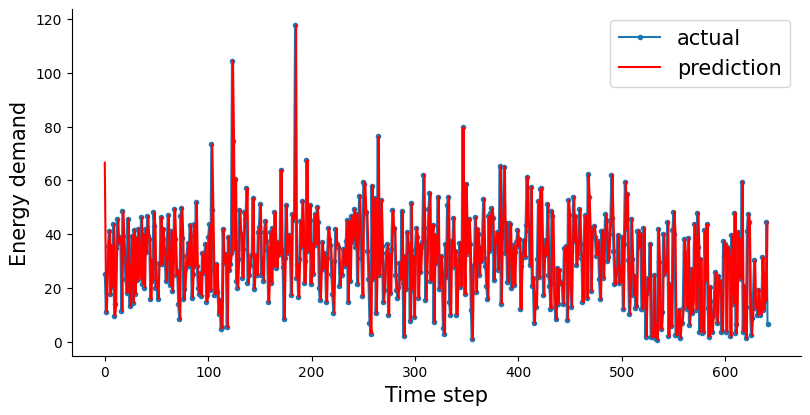

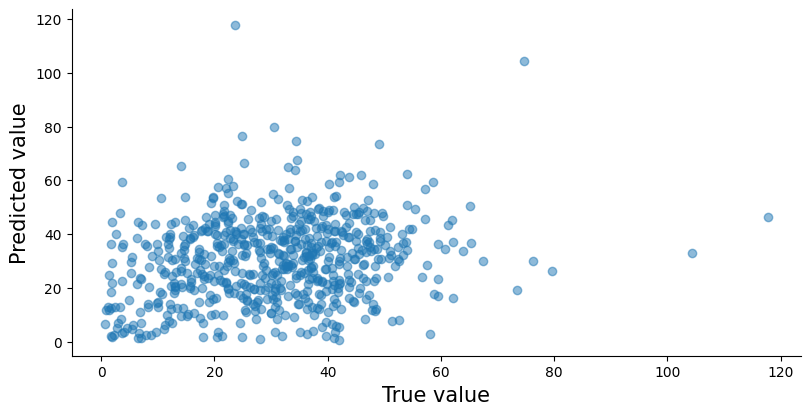

In [337]:
plot_training_actual_predict(plot_prediction, plot_prediction_corr, actual_predict)

In [323]:
loss_function = pd.DataFrame(
                                {'train': historyRecord.history['loss'],
                                'val': historyRecord.history['val_loss']
                                })

#### Model training and evaluation: repeat n times

In [338]:
model_verbose = 0
plot_loss = False
plot_prediction = False
plot_prediction_corr = False
earlyStop = False
scores = repeat_evaluate(data_normalized, train_val_split_ratio, 30)

Enter 0 time:
        mean mse:  365.1911477492212
        mean rmse:  19.109975084997394
        mean mae:  14.92882398753894
    prediction finished!
        errors:  [365.1911477492212, 19.109975084997394, 14.92882398753894]
Enter 1 time:
        mean mse:  365.1911477492212
        mean rmse:  19.109975084997394
        mean mae:  14.92882398753894
    prediction finished!
        errors:  [365.1911477492212, 19.109975084997394, 14.92882398753894]
Enter 2 time:
        mean mse:  365.1911477492212
        mean rmse:  19.109975084997394
        mean mae:  14.92882398753894
    prediction finished!
        errors:  [365.1911477492212, 19.109975084997394, 14.92882398753894]
Enter 3 time:
        mean mse:  365.1911477492212
        mean rmse:  19.109975084997394
        mean mae:  14.92882398753894
    prediction finished!
        errors:  [365.1911477492212, 19.109975084997394, 14.92882398753894]
Enter 4 time:
        mean mse:  365.1911477492212
        mean rmse:  19.10997508499739

In [339]:
output_scores = pd.DataFrame(scores)
output_scores

,0,1,2
0,365.191148,19.109975,14.928824
1,365.191148,19.109975,14.928824
2,365.191148,19.109975,14.928824
3,365.191148,19.109975,14.928824
4,365.191148,19.109975,14.928824
5,365.191148,19.109975,14.928824
6,365.191148,19.109975,14.928824
7,365.191148,19.109975,14.928824
8,365.191148,19.109975,14.928824
9,365.191148,19.109975,14.928824


naive_persist: 365.191 RMSE (+/- 0.000)


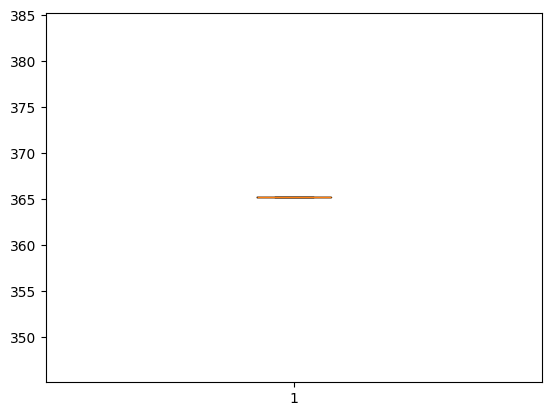

naive_persist: 19.110 RMSE (+/- 0.000)


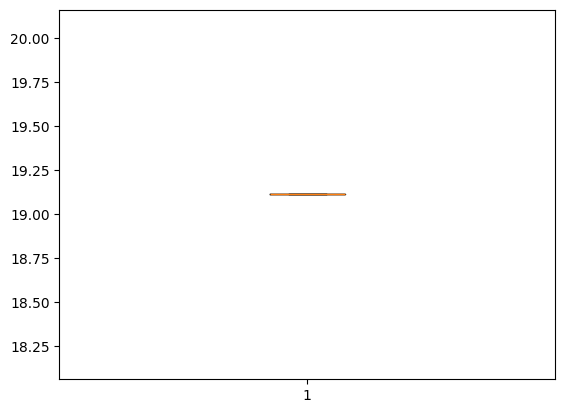

naive_persist: 14.929 RMSE (+/- 0.000)


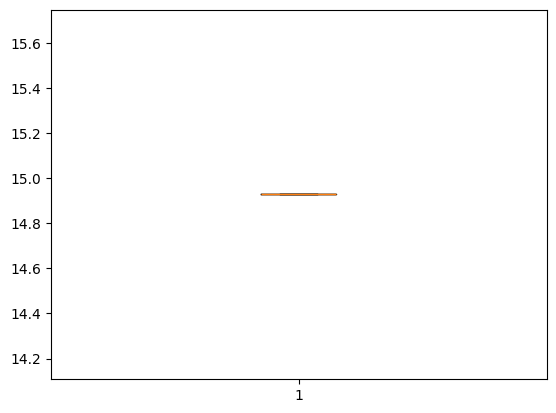

In [340]:
scores = np.rot90(np.fliplr(scores))

summarize_scores(model_name, scores)

#### Output data

In [341]:
output_scores

,0,1,2
0,365.191148,19.109975,14.928824
1,365.191148,19.109975,14.928824
2,365.191148,19.109975,14.928824
3,365.191148,19.109975,14.928824
4,365.191148,19.109975,14.928824
5,365.191148,19.109975,14.928824
6,365.191148,19.109975,14.928824
7,365.191148,19.109975,14.928824
8,365.191148,19.109975,14.928824
9,365.191148,19.109975,14.928824


In [328]:
loss_function

,train,val
0,0.098789,0.090106
1,0.091026,0.089366
2,0.092367,0.090482
3,0.092976,0.089533
4,0.093009,0.089876
5,0.092127,0.090084
6,0.092398,0.089922
7,0.091587,0.090663
8,0.092753,0.090211
9,0.093468,0.090441


In [342]:
actual_predict

,actual,predict
0,25.236,66.556
1,11.008,25.236
2,25.632,11.008
3,35.746,25.632
4,41.230,35.746
...,...,...
637,11.838,31.333
638,25.440,11.838
639,15.122,25.440
640,44.383,15.122


In [343]:
output_scores.to_csv(model_name + "scores.csv")
actual_predict.to_csv(model_name + "actual_predict.csv")

In [331]:
loss_function.to_csv(model_name + "loss_function.csv")